In [1]:
import time
import numpy as np
import concurrent.futures

def sequential_matrix_multiply(matrix_a, matrix_b):
    return np.dot(matrix_a, matrix_b)

def parallel_matrix_multiply(matrix_a, matrix_b, num_threads):
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
        result = np.zeros_like(matrix_a)
        chunk_size = len(matrix_a) // num_threads
        futures = []

        for i in range(num_threads):
            start_idx = i * chunk_size
            end_idx = start_idx + chunk_size
            futures.append(executor.submit(np.dot, matrix_a[start_idx:end_idx], matrix_b, out=result[start_idx:end_idx]))

        concurrent.futures.wait(futures)

    return result

# Generate random matrices for testing
matrix_size = 1000
matrix_a = np.random.rand(matrix_size, matrix_size)
matrix_b = np.random.rand(matrix_size, matrix_size)

# Sequential multiplication
start_time = time.time()
result_seq = sequential_matrix_multiply(matrix_a, matrix_b)
sequential_time = time.time() - start_time

# Parallel multiplication with different numbers of threads
for num_threads in [2, 4, 8]:
    start_time = time.time()
    result_parallel = parallel_matrix_multiply(matrix_a, matrix_b, num_threads)
    parallel_time = time.time() - start_time

    print(f"Number of Threads: {num_threads}")
    print(f"Sequential Time: {sequential_time:.4f} seconds")
    print(f"Parallel Time: {parallel_time:.4f} seconds")
    print("=" * 30)

Number of Threads: 2
Sequential Time: 0.0284 seconds
Parallel Time: 0.0312 seconds
Number of Threads: 4
Sequential Time: 0.0284 seconds
Parallel Time: 0.0312 seconds
Number of Threads: 8
Sequential Time: 0.0284 seconds
Parallel Time: 0.0312 seconds


In [6]:
import time
import numpy as np
import concurrent.futures

def sequential_matrix_multiply(matrix_a, matrix_b):
    return np.dot(matrix_a, matrix_b)

def parallel_matrix_multiply(matrix_a, matrix_b, num_threads):
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
        result = np.zeros_like(matrix_a)
        chunk_size = len(matrix_a) // num_threads
        futures = []

        for i in range(num_threads):
            start_idx = i * chunk_size
            end_idx = start_idx + chunk_size
            futures.append(executor.submit(np.dot, matrix_a[start_idx:end_idx], matrix_b, out=result[start_idx:end_idx]))

        concurrent.futures.wait(futures)

    return result

matrix_sizes = [(5, 5), (50, 50), (100, 100), (1000, 1000)]

for matrix_size in matrix_sizes:
    rows, cols = matrix_size
    matrix_a = np.random.rand(rows, cols)
    matrix_b = np.random.rand(cols, rows)

    # Sequential multiplication
    start_time = time.time()
    result_seq = sequential_matrix_multiply(matrix_a, matrix_b)
    sequential_time = time.time() - start_time

    # Parallel multiplication with different numbers of threads
    for num_threads in [2, 4, 8]:
        start_time = time.time()
        result_parallel = parallel_matrix_multiply(matrix_a, matrix_b, num_threads)
        parallel_time = time.time() - start_time

        print(f"Matrix Size: {matrix_size}, Threads: {num_threads}")
        print(f"Sequential Time: {sequential_time:.20f} seconds")
        print(f"Parallel Time: {parallel_time:.20f} seconds")
#         print(f"Sequential Time: {sequential_time} seconds")
#         print(f"Parallel Time: {parallel_time} seconds")
        print("=" * 30)

Matrix Size: (5, 5), Threads: 2
Sequential Time: 0.00040674209594726562 seconds
Parallel Time: 0.00235962867736816406 seconds
Matrix Size: (5, 5), Threads: 4
Sequential Time: 0.00040674209594726562 seconds
Parallel Time: 0.00112390518188476562 seconds
Matrix Size: (5, 5), Threads: 8
Sequential Time: 0.00040674209594726562 seconds
Parallel Time: 0.00251030921936035156 seconds
Matrix Size: (50, 50), Threads: 2
Sequential Time: 0.00000000000000000000 seconds
Parallel Time: 0.00138735771179199219 seconds
Matrix Size: (50, 50), Threads: 4
Sequential Time: 0.00000000000000000000 seconds
Parallel Time: 0.00000000000000000000 seconds
Matrix Size: (50, 50), Threads: 8
Sequential Time: 0.00000000000000000000 seconds
Parallel Time: 0.00000000000000000000 seconds
Matrix Size: (100, 100), Threads: 2
Sequential Time: 0.00000000000000000000 seconds
Parallel Time: 0.00645327568054199219 seconds
Matrix Size: (100, 100), Threads: 4
Sequential Time: 0.00000000000000000000 seconds
Parallel Time: 0.0005035

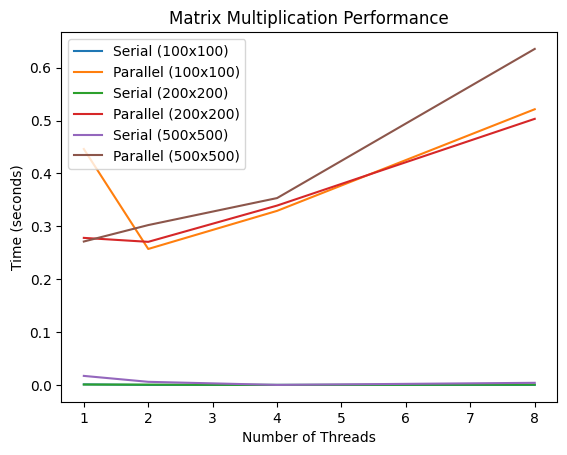

In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing

def serial_matrix_multiply(matrix_a, matrix_b):
    return np.dot(matrix_a, matrix_b)

def parallel_matrix_multiply(matrix_a, matrix_b, num_threads):
    with multiprocessing.Pool(processes=num_threads) as pool:
        result = np.zeros_like(matrix_a)
        chunk_size = len(matrix_a) // num_threads
        matrices_a_split = [matrix_a[i:i + chunk_size] for i in range(0, len(matrix_a), chunk_size)]

        results = pool.starmap(np.dot, [(matrices_a_split[i], matrix_b) for i in range(num_threads)])
        for i in range(num_threads):
            start_idx = i * chunk_size
            end_idx = start_idx + chunk_size
            result[start_idx:end_idx] = results[i]

    return result

def measure_time(matrix_size, num_threads):
    matrix_a = np.random.rand(matrix_size, matrix_size)
    matrix_b = np.random.rand(matrix_size, matrix_size)

    # Serial multiplication
    start_time_serial = time.time()
    result_serial = serial_matrix_multiply(matrix_a, matrix_b)
    serial_time = time.time() - start_time_serial

    # Parallel multiplication
    start_time_parallel = time.time()
    result_parallel = parallel_matrix_multiply(matrix_a, matrix_b, num_threads)
    parallel_time = time.time() - start_time_parallel

    return serial_time, parallel_time

def plot_performance(matrix_sizes, thread_counts):
    for matrix_size in matrix_sizes:
        serial_times = []
        parallel_times = []

        for num_threads in thread_counts:
            serial_time, parallel_time = measure_time(matrix_size, num_threads)
            serial_times.append(serial_time)
            parallel_times.append(parallel_time)

        plt.plot(thread_counts, serial_times, label=f'Serial ({matrix_size}x{matrix_size})')
        plt.plot(thread_counts, parallel_times, label=f'Parallel ({matrix_size}x{matrix_size})')

    plt.title('Matrix Multiplication Performance')
    plt.xlabel('Number of Threads')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    matrix_sizes = [100, 200, 500]  # Adjust matrix sizes as needed
    thread_counts = [1, 2, 4, 8]   # Adjust thread counts as needed

    plot_performance(matrix_sizes, thread_counts)

In [1]:
!pip install numba

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.6 MB 2.6 MB/s eta 0:00:01
     -- ------------------------------------- 0.2/2.6 MB 2.1 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.6 MB 2.1 MB/s eta 0:00:02
     ------ --------------------------------- 0.4/2.6 MB 2.3 MB/s eta 0:00:01
     ------- -------------------------------- 0.5/2.6 MB 2.2 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/2.6 MB 2.1 MB/s eta 0:00:01
     ---------- ----------------------------- 0.7/2.6 MB 2.1 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/2.6 MB 2.1 MB/s eta 0:00:01
     ------------ --------------------------- 0.8/2.6 MB 1.9 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/2.6 MB 2.0 MB/s eta 0:00:01
     ---------------- ----------------------- 1.1/2.6 MB 2.1 MB/s eta 0:00:01
     ------------------ --------------------- 1.2/2.6 MB 2.1 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
from numba import njit, prange
import time

In [2]:
N=3

In [4]:
@njit(parallel=True)
def multiply_matrix(A, B, result):
    for i in prange(N):
        for j in range(N):
            result[i, j] = 0
            for k in range(N):
                result[i, j] += A[i, k] * B[k, j]

In [5]:
if __name__ == "__main__":
    A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    B = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
    result = np.zeros((N, N))

    # Perform matrix multiplication
    start_time = time.time()
    multiply_matrix(A, B, result)
    end_time = time.time()

    # Display matrices and result
    print("Matrix A:")
    print(A)
    print("\nMatrix B:")
    print(B)
    print("\nResult Matrix:")
    print(result)

    # Display execution time
    print("\nMatrix multiplication took", end_time - start_time, "seconds.")

Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix B:
[[9 8 7]
 [6 5 4]
 [3 2 1]]

Result Matrix:
[[ 30.  24.  18.]
 [ 84.  69.  54.]
 [138. 114.  90.]]

Matrix multiplication took 3.0713582038879395 seconds.


In [6]:
import numpy as np
import time
from numba import njit, prange

@njit(parallel=True)
def multiply_matrix(A, B, result):
    for i in prange(N):
        for j in range(N):
            result[i, j] = 0
            for k in range(N):
                result[i, j] += A[i, k] * B[k, j]

if __name__ == "__main__":
    # Define different sizes for matrices
    sizes = [5, 50, 100, 1000]

    for N in sizes:
        # Create matrices A and B
        A = np.random.randint(1, 10, size=(N, N))
        B = np.random.randint(1, 10, size=(N, N))
        result = np.zeros((N, N))

        # Perform matrix multiplication
        start_time = time.time()
        multiply_matrix(A, B, result)
        end_time = time.time()

        # Display matrices and result for each size
        print(f"\nMatrix A ({N}x{N}):")
        print(A)
        print(f"\nMatrix B ({N}x{N}):")
        print(B)
        print("\nResult Matrix:")
        print(result)

        # Display execution time
        print("\nMatrix multiplication took", end_time - start_time, "seconds.\n")



Matrix A (5x5):
[[3 4 4 3 1]
 [8 8 1 7 7]
 [6 7 2 1 1]
 [2 4 8 3 1]
 [6 5 1 3 7]]

Matrix B (5x5):
[[1 8 7 8 1]
 [5 7 3 9 6]
 [4 2 1 2 8]
 [3 7 5 2 9]
 [9 5 2 9 3]]

Result Matrix:
[[ 57.  86.  54.  83.  89.]
 [136. 206. 130. 215. 148.]
 [ 61. 113.  72. 126.  76.]
 [ 72.  86.  51.  83. 120.]
 [107. 141.  87. 164.  92.]]

Matrix multiplication took 0.8971338272094727 seconds.


Matrix A (50x50):
[[4 1 4 ... 8 6 5]
 [3 3 6 ... 4 5 5]
 [6 5 6 ... 6 1 7]
 ...
 [4 9 7 ... 7 5 9]
 [9 7 9 ... 3 6 9]
 [9 6 1 ... 5 9 8]]

Matrix B (50x50):
[[6 7 7 ... 5 9 5]
 [2 4 7 ... 7 2 9]
 [8 8 9 ... 6 3 8]
 ...
 [9 8 6 ... 6 4 6]
 [6 7 2 ... 2 5 8]
 [7 5 6 ... 2 7 9]]

Result Matrix:
[[ 82.  86. 101. ...   0.   0.   0.]
 [148. 152. 185. ...   0.   0.   0.]
 [202. 209. 266. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]

Matrix multiplication took 0.0 seconds.


Matrix A (100x100):
[[1 6 5 ... 5 2 7]
 [2 3 5 ... 4 7 

In [2]:
import time
m = 100
X = [[1]*m]*m
Y = [[1]*m]*m
 
def mult(X, Y):
   result = [[0]*m]
   for z in range(len(Y[0])):
       for k in range(len(Y)):
           result[0][z] += X[0] * Y[k][z]
   # print(result)
start = time.perf_counter()
for i in range(len(X[0])):
   mult(X[i], Y)
end = time.perf_counter()
 
print(f"Time taken to complete mult(){m}x{m} without threading: {round(end - start, 5)} seconds(s)")

Time taken to complete mult()100x100 without threading: 0.12469 seconds(s)


In [1]:
import threading
import time
 
m = 100
X = [[1]*m]*m
Y = [[1]*m]*m
 
def mult(X, Y):
   result = [[0]*m]
   for z in range(len(Y[0])):
       for k in range(len(Y)):
           result[0][z] += X[0] * Y[k][z]
   # print(f" {result}")
 
threads = list()
start = time.perf_counter()
for i in range(len(X[0])):
   x = threading.Thread(target = mult, args=(X[i], Y))
   threads.append(x)
   x.start()
 
for index, thread in enumerate(threads):
   thread.join()
end = time.perf_counter()
 
print(f"Time taken to complete mult() {m}x{m}: {round(end - start, 5)} seconds(s)")

Time taken to complete mult() 100x100: 0.13806 seconds(s)


In [7]:
import numpy as np
import time
import concurrent.futures

def single_threaded_matrix_operation(matrix):
    start_time = time.time()

    # Example matrix operation (replace with your actual code)
    result = np.matmul(matrix, matrix)

    end_time = time.time()
    elapsed_time = end_time - start_time

    return elapsed_time

def multi_threaded_matrix_operation(matrix):
    start_time = time.time()

    # Example matrix operation (replace with your actual code)
    with concurrent.futures.ThreadPoolExecutor() as executor:
        result = list(executor.map(np.matmul, [matrix], [matrix]))

    end_time = time.time()
    elapsed_time = end_time - start_time

    return elapsed_time

# Example usage
matrix_sizes = [(4, 4), (10, 10), (100, 100), (1000, 1000),(5000,5000),(10000,10000),(20000,20000)]

for sno, size in enumerate(matrix_sizes, start=1):
    matrix = np.random.rand(size[0], size[1])

    single_threaded_time = single_threaded_matrix_operation(matrix)
    multi_threaded_time = multi_threaded_matrix_operation(matrix)

    print(f"{sno}\nSize of matrix: {size[0]}x{size[1]}\nSingle Threaded (s): {single_threaded_time:.8f}\nMulti Threaded (s): {multi_threaded_time:.8f}\n")


1
Size of matrix: 4x4
Single Threaded (s): 0.00000000
Multi Threaded (s): 0.00095630

2
Size of matrix: 10x10
Single Threaded (s): 0.00000000
Multi Threaded (s): 0.00099683

3
Size of matrix: 100x100
Single Threaded (s): 0.00005555
Multi Threaded (s): 0.00000000

4
Size of matrix: 1000x1000
Single Threaded (s): 0.02343416
Multi Threaded (s): 0.02087045

5
Size of matrix: 5000x5000
Single Threaded (s): 2.05632591
Multi Threaded (s): 2.16227412

6
Size of matrix: 10000x10000
Single Threaded (s): 17.34312010
Multi Threaded (s): 16.84432411

7
Size of matrix: 20000x20000
Single Threaded (s): 261.52020192
Multi Threaded (s): 274.04819822



In [8]:
import time
import numpy as np
import concurrent.futures

def sequential_matrix_multiply(matrix_a, matrix_b):
    return np.dot(matrix_a, matrix_b)

def parallel_matrix_multiply(matrix_a, matrix_b, num_threads):
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
        result = np.zeros_like(matrix_a)
        chunk_size = len(matrix_a) // num_threads
        futures = []

        for i in range(num_threads):
            start_idx = i * chunk_size
            end_idx = start_idx + chunk_size
            futures.append(executor.submit(np.dot, matrix_a[start_idx:end_idx], matrix_b, out=result[start_idx:end_idx]))

        concurrent.futures.wait(futures)

    return result

matrix_sizes = [(5, 5), (50, 50), (100, 100), (1000, 1000)]

for matrix_size in matrix_sizes:
    rows, cols = matrix_size
    matrix_a = np.random.rand(rows, cols)
    matrix_b = np.random.rand(cols, rows)

    # Sequential multiplication
    start_time = time.time()
    result_seq = sequential_matrix_multiply(matrix_a, matrix_b)
    sequential_time = time.time() - start_time

    # Parallel multiplication with different numbers of threads
    for num_threads in [2, 4, 8]:
        start_time = time.time()
        result_parallel = parallel_matrix_multiply(matrix_a, matrix_b, num_threads)
        parallel_time = time.time() - start_time

        print(f"Matrix Size: {matrix_size}, Threads: {num_threads}")
        print(f"Sequential Time: {sequential_time:.20f} seconds")
        print(f"Parallel Time: {parallel_time:.20f} seconds")
#         print(f"Sequential Time: {sequential_time} seconds")
#         print(f"Parallel Time: {parallel_time} seconds")
print("="*30)

Matrix Size: (5, 5), Threads: 2
Sequential Time: 0.01457905769348144531 seconds
Parallel Time: 0.02723097801208496094 seconds
Matrix Size: (5, 5), Threads: 4
Sequential Time: 0.01457905769348144531 seconds
Parallel Time: 0.00410366058349609375 seconds
Matrix Size: (5, 5), Threads: 8
Sequential Time: 0.01457905769348144531 seconds
Parallel Time: 0.00194740295410156250 seconds
Matrix Size: (50, 50), Threads: 2
Sequential Time: 0.00000000000000000000 seconds
Parallel Time: 0.00128102302551269531 seconds
Matrix Size: (50, 50), Threads: 4
Sequential Time: 0.00000000000000000000 seconds
Parallel Time: 0.00053620338439941406 seconds
Matrix Size: (50, 50), Threads: 8
Sequential Time: 0.00000000000000000000 seconds
Parallel Time: 0.00250411033630371094 seconds
Matrix Size: (100, 100), Threads: 2
Sequential Time: 0.00000000000000000000 seconds
Parallel Time: 0.00341105461120605469 seconds
Matrix Size: (100, 100), Threads: 4
Sequential Time: 0.00000000000000000000 seconds
Parallel Time: 0.0018792

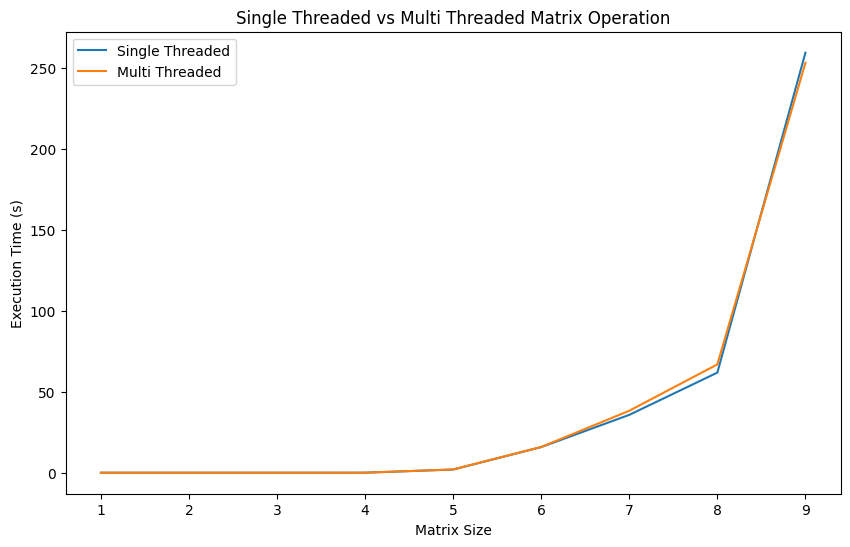

In [10]:
import numpy as np
import time
import concurrent.futures
import matplotlib.pyplot as plt

def single_threaded_matrix_operation(matrix):
    start_time = time.time()

    # Example matrix operation (replace with your actual code)
    result = np.matmul(matrix, matrix)

    end_time = time.time()
    elapsed_time = end_time - start_time

    return elapsed_time

def multi_threaded_matrix_operation(matrix):
    start_time = time.time()

    # Example matrix operation (replace with your actual code)
    with concurrent.futures.ThreadPoolExecutor() as executor:
        result = list(executor.map(np.matmul, [matrix], [matrix]))

    end_time = time.time()
    elapsed_time = end_time - start_time

    return elapsed_time

# Example usage
matrix_sizes = [(4, 4), (10, 10), (100, 100), (1000, 1000), (5000, 5000), (10000, 10000),(13000,13000),(15000,15000),(20000,20000)]

single_threaded_times = []
multi_threaded_times = []

for size in matrix_sizes:
    matrix = np.random.rand(size[0], size[1])

    single_threaded_time = single_threaded_matrix_operation(matrix)
    multi_threaded_time = multi_threaded_matrix_operation(matrix)

    single_threaded_times.append(single_threaded_time)
    multi_threaded_times.append(multi_threaded_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(matrix_sizes) + 1), single_threaded_times, label='Single Threaded')
plt.plot(range(1, len(matrix_sizes) + 1), multi_threaded_times, label='Multi Threaded')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (s)')
plt.title('Single Threaded vs Multi Threaded Matrix Operation')
plt.legend()
plt.show()


In [12]:
import time
import numpy as np
import concurrent.futures
import pandas as pd

def sequential_matrix_multiply(matrix_a, matrix_b):
    return np.dot(matrix_a, matrix_b)

def parallel_matrix_multiply(matrix_a, matrix_b, num_threads):
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
        result = np.zeros_like(matrix_a)
        chunk_size = len(matrix_a) // num_threads
        futures = []

        for i in range(num_threads):
            start_idx = i * chunk_size
            end_idx = start_idx + chunk_size
            futures.append(executor.submit(np.dot, matrix_a[start_idx:end_idx], matrix_b, out=result[start_idx:end_idx]))

        concurrent.futures.wait(futures)

    return result

matrix_sizes = [(5, 5), (50, 50), (100, 100), (250, 250),(500,500), (750, 750), (1000, 1000), (2000, 2000), (5000, 5000)]

# Create an empty list to store the results
results_list = []

for matrix_size in matrix_sizes:
    rows, cols = matrix_size
    matrix_a = np.random.rand(rows, cols)
    matrix_b = np.random.rand(cols, rows)

    # Sequential multiplication
    start_time = time.time()
    result_seq = sequential_matrix_multiply(matrix_a, matrix_b)
    sequential_time = time.time() - start_time

    # Parallel multiplication with different numbers of threads
    for num_threads in [2, 4, 8, 10, 15, 20]:
        start_time = time.time()
        result_parallel = parallel_matrix_multiply(matrix_a, matrix_b, num_threads)
        parallel_time = time.time() - start_time

        # Append the results to the list
        results_list.append({
            'Matrix Size': matrix_size,
            'Threads': num_threads,
            'Sequential Time': sequential_time,
            'Parallel Time': parallel_time
        })

df = pd.DataFrame(results_list)
df

,Matrix Size,Threads,Sequential Time,Parallel Time
0,"(5, 5)",2,0.006847,0.041317
1,"(5, 5)",4,0.006847,0.000997
2,"(5, 5)",8,0.006847,0.001996
3,"(5, 5)",10,0.006847,0.001994
4,"(5, 5)",15,0.006847,0.002061
5,"(5, 5)",20,0.006847,0.003046
6,"(50, 50)",2,0.000000,0.000000
7,"(50, 50)",4,0.000000,0.000000
8,"(50, 50)",8,0.000000,0.004506
9,"(50, 50)",10,0.000000,0.000000


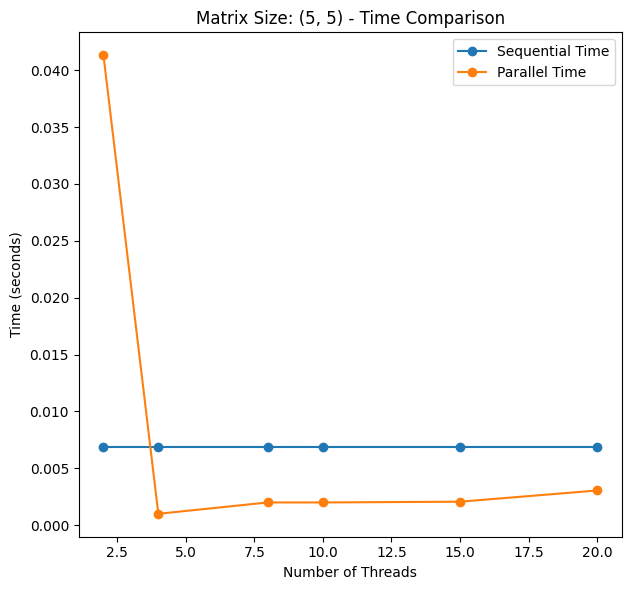

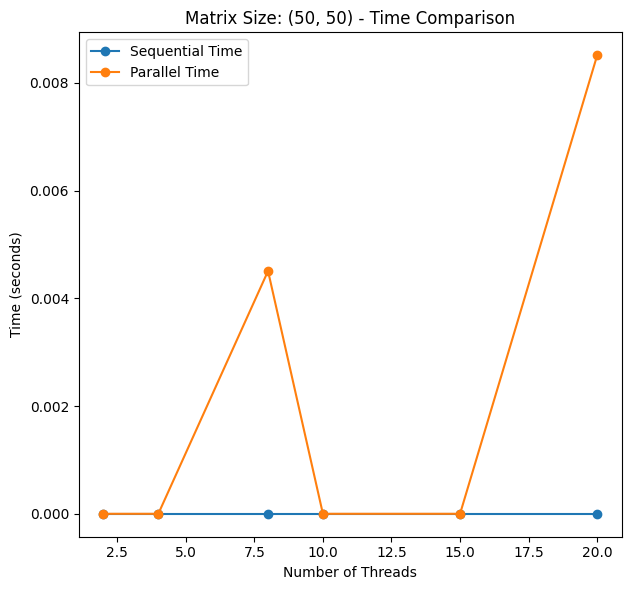

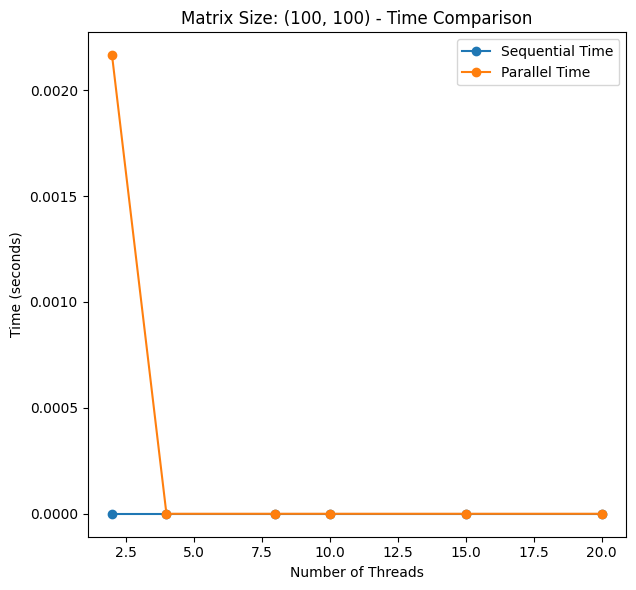

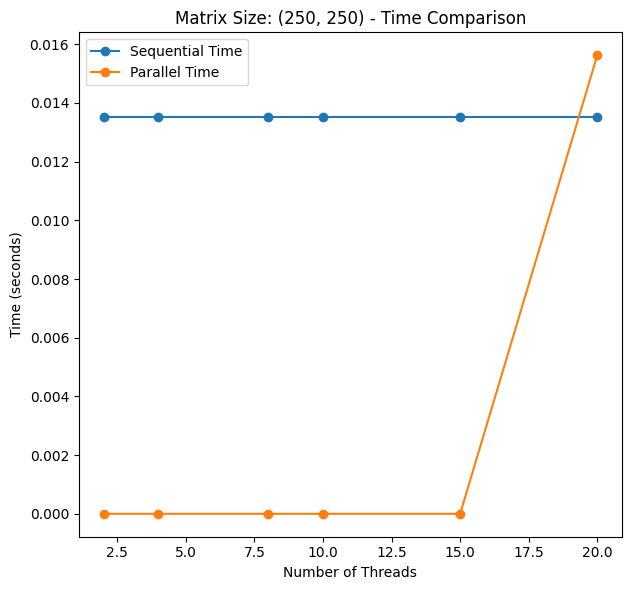

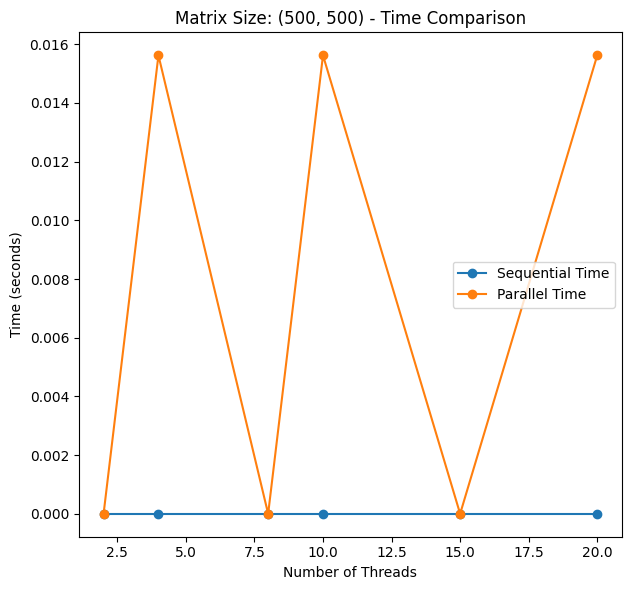

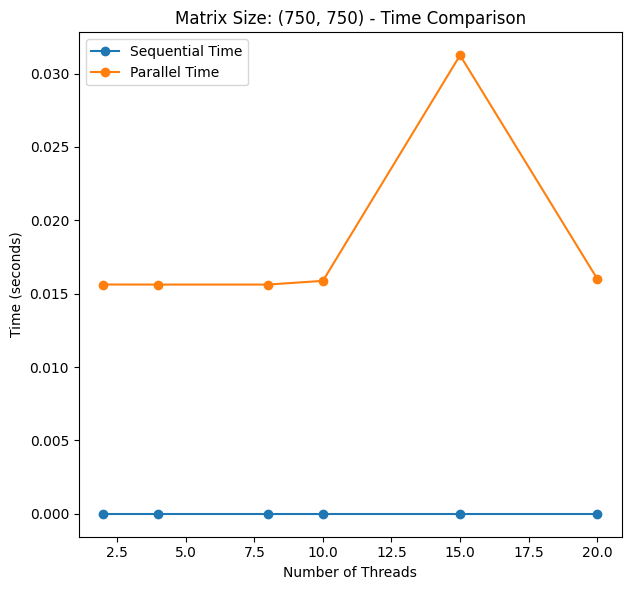

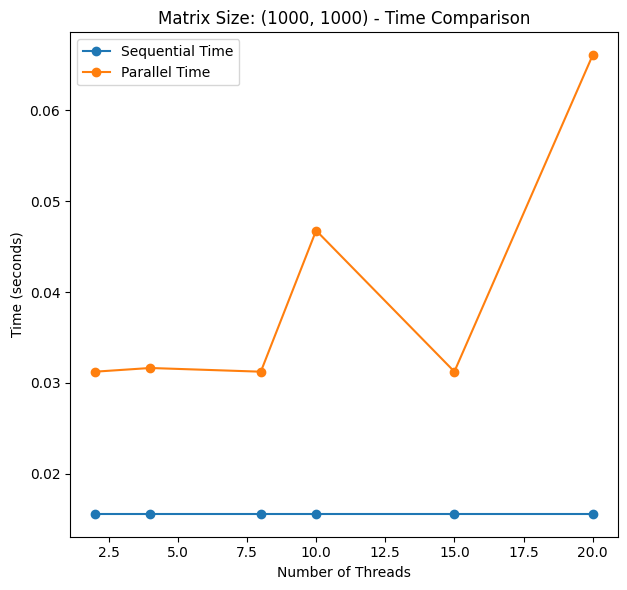

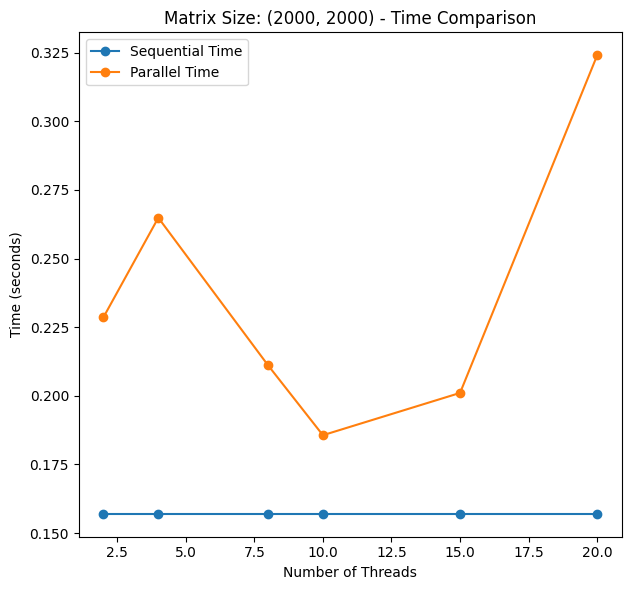

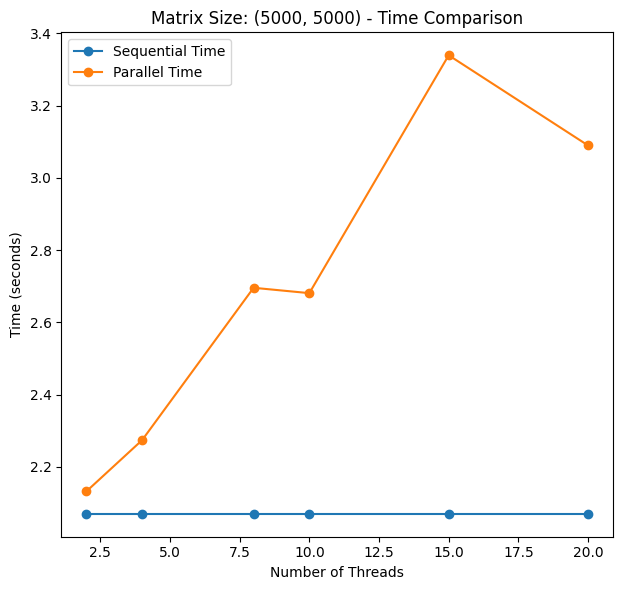

In [13]:
import matplotlib.pyplot as plt

matrix_sizes = df['Matrix Size'].unique()

for matrix_size in matrix_sizes:
    subset_df = df[df['Matrix Size'] == matrix_size]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(subset_df['Threads'], subset_df['Sequential Time'], marker='o', label='Sequential Time')
    plt.plot(subset_df['Threads'], subset_df['Parallel Time'], marker='o', label='Parallel Time')
    plt.title(f"Matrix Size: {matrix_size} - Time Comparison")
    plt.xlabel("Number of Threads")
    plt.ylabel("Time (seconds)")
    plt.legend()
    plt.tight_layout()
    plt.show()

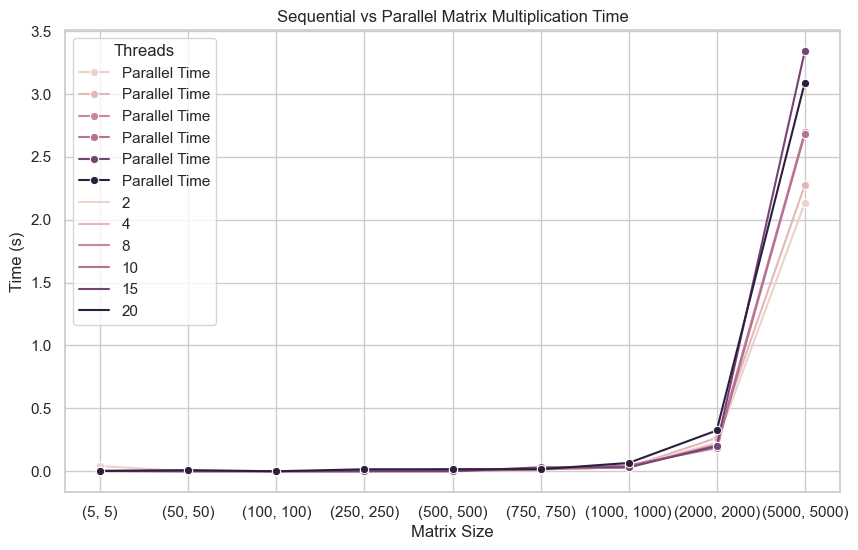

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Convert 'Matrix Size' to string for plotting
df['Matrix Size'] = df['Matrix Size'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))

# Plot for sequential and parallel time
sns.lineplot(data=df[df['Threads'] == 1], x='Matrix Size', y='Sequential Time', marker='o', label='Sequential Time')
sns.lineplot(data=df, x='Matrix Size', y='Parallel Time', hue='Threads', marker='o', label='Parallel Time')
plt.title('Sequential vs Parallel Matrix Multiplication Time')
plt.xlabel('Matrix Size')
plt.ylabel('Time (s)')
plt.legend(title='Threads')

plt.show()


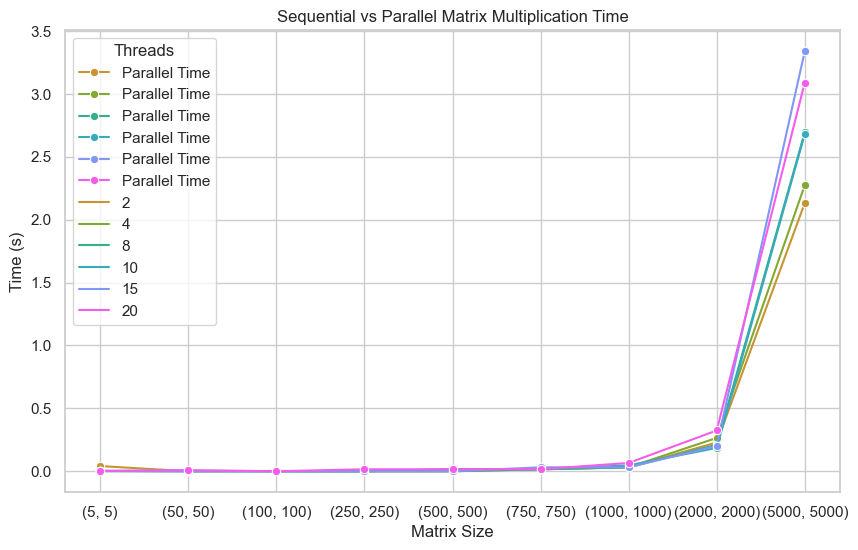

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Convert 'Matrix Size' to string for plotting
df['Matrix Size'] = df['Matrix Size'].astype(str)

# Define custom colors for better visibility
colors = sns.color_palette("husl", n_colors=len(df['Threads'].unique()) + 1)

# Plotting
plt.figure(figsize=(10, 6))

# Plot for sequential and parallel time
sns.lineplot(data=df[df['Threads'] == 1], x='Matrix Size', y='Sequential Time', marker='o', color=colors[0], label='Sequential Time')
sns.lineplot(data=df, x='Matrix Size', y='Parallel Time', hue='Threads', marker='o', palette=colors[1:], label='Parallel Time')
plt.title('Sequential vs Parallel Matrix Multiplication Time')
plt.xlabel('Matrix Size')
plt.ylabel('Time (s)')
plt.legend(title='Threads')

plt.show()


# 18/01/24

In [ ]:
# import time
# import numpy as np
# import concurrent.futures
# import pandas as pd

# def sequential_matrix_multiply(matrix_a, matrix_b):
#     rows, cols = len(matrix_a), len(matrix_b[0])
#     result = np.zeros((rows, cols))

#     for i in range(rows):
#         for j in range(cols):
#             for k in range(len(matrix_a[0])):
#                 result[i][j] += matrix_a[i][k] * matrix_b[k][j]

#     return result

# def parallel_matrix_multiply(matrix_a, matrix_b, num_threads):
#     with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
#         result = np.zeros_like(matrix_a)
#         rows, cols = len(matrix_a), len(matrix_b[0])
#         chunk_size = rows // num_threads
#         futures = []

#         for i in range(num_threads):
#             start_idx = i * chunk_size
#             end_idx = start_idx + chunk_size
#             futures.append(executor.submit(matrix_multiply_chunk, matrix_a[start_idx:end_idx], matrix_b, result, start_idx))

#         concurrent.futures.wait(futures)

#     return result

# def matrix_multiply_chunk(matrix_a_chunk, matrix_b, result, start_idx):
#     for i in range(len(matrix_a_chunk)):
#         for j in range(len(matrix_b[0])):
#             for k in range(len(matrix_a_chunk[0])):
#                 result[start_idx + i][j] += matrix_a_chunk[i][k] * matrix_b[k][j]

# def compare_results(result_seq, result_parallel):
#     return np.allclose(result_seq, result_parallel)

# matrix_sizes = [(5, 5), (50, 50), (100, 100), (250, 250),(500,500), (750, 750), (1000, 1000), (2000, 2000)]

# # Create an empty list to store the results
# results_list = []

# for matrix_size in matrix_sizes:
#     rows, cols = matrix_size
#     matrix_a = np.random.rand(rows, cols)
#     matrix_b = np.random.rand(cols, rows)

#     # Sequential multiplication
#     start_time = time.time()
#     result_seq = sequential_matrix_multiply(matrix_a, matrix_b)
#     sequential_time = time.time() - start_time

#     # Parallel multiplication with different numbers of threads
#     for num_threads in [1, 2, 4, 8, 10, 15, 20]:
#         start_time = time.time()
#         result_parallel = parallel_matrix_multiply(matrix_a, matrix_b, num_threads)
#         parallel_time = time.time() - start_time

#         # Compare results
#         is_equal = compare_results(result_seq, result_parallel)

#         # Append the results to the list
#         results_list.append({
#             'Matrix Size': matrix_size,
#             'Threads': num_threads,
#             'Sequential Time': sequential_time,
#             'Parallel Time': parallel_time,
#             'Results Match': is_equal
#         })

# df2 = pd.DataFrame(results_list)
# print(df2)